In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
fast_food_df = pd.read_csv('Data\WA_Marketing-Campaign.csv')

# Objective

![Fast Food Promotion](https://cureandcraft.com/wp-content/uploads/2024/03/Fast-Food.jpg)

We will analyze the data and conduct statistical tests to determine if the three different promotion types for fast food are statistically different from each other, and if so, identify which promotion is the most effective in terms of monthly sales.

# Findings from EDA

I have performed exploratory data analysis (EDA) in the EDA.ipynb file and will make decisions based on the findings. To see all the visualizations, please refer to the EDA.ipynb file.

These are the findings that were the most relevant.

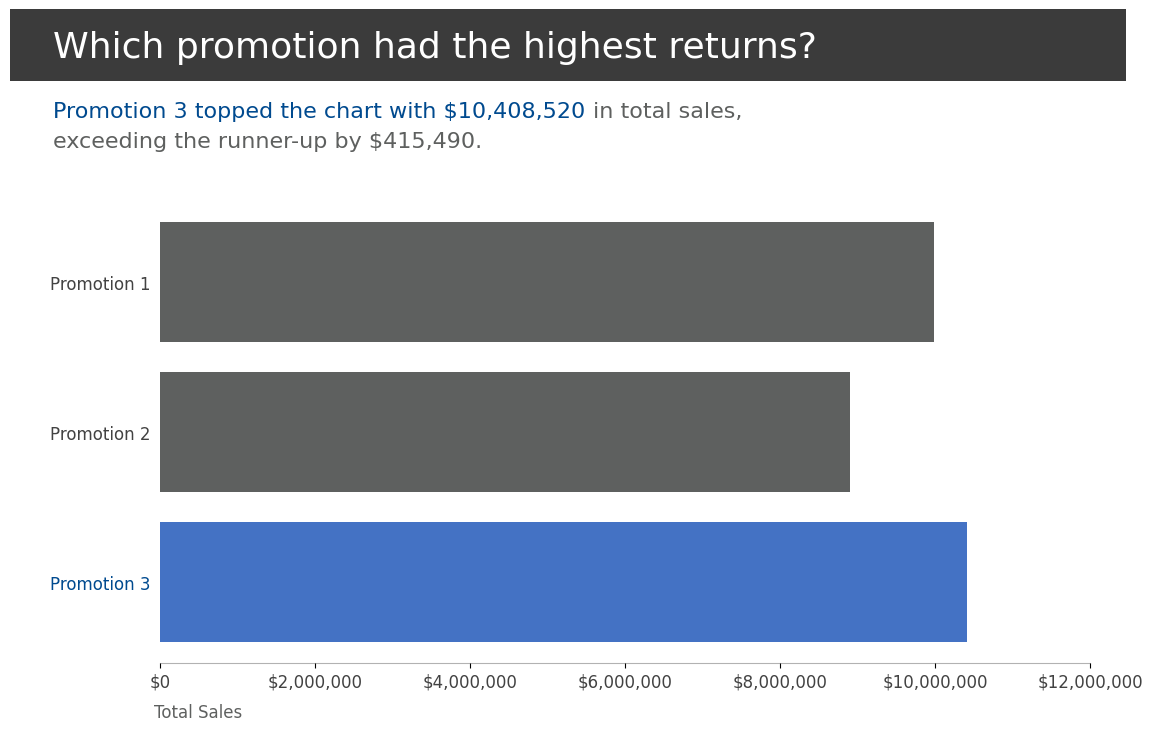

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))  # Increased width from 10 to 12

sales_sum = fast_food_df.groupby('Promotion')['SalesInThousands'].sum().reset_index()
ax.barh(sales_sum['Promotion'].values, sales_sum['SalesInThousands'].values[::-1], color=["#4472c4", "#5e605f", "#5e605f"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.yaxis.set_ticks_position('none')

rect = patches.Rectangle((0, 1.08), 0.93, 0.12, 
                         facecolor='#3b3b3b', 
                         edgecolor='none', 
                         transform=fig.transFigure, 
                         zorder=-1)
fig.patches.append(rect)

ax.set_title('Which promotion had the highest returns?', loc='left', color="white", x=0.036, y=1.12, fontsize=26, transform=fig.transFigure)

ax.set_xticks(ticks=ax.get_xticks(), labels=["$0", "$2,000,000", "$4,000,000", "$6,000,000", 
                                       "$8,000,000", "$10,000,000", "$12,000,000"], color="#424242", fontsize=12)
ax.set_yticks(ticks=[1, 2, 3], labels=["Promotion 3", "Promotion 2", "Promotion 1"], color="#424242", fontsize=12)
yticks = plt.gca().get_yticklabels()
yticks[0].set_color("#004a8f")

ax.text(0.036, 1.02, 'Promotion 3 topped the chart with $10,408,520', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#004a8f")
ax.text(0.036 + 0.45, 1.02, 'in total sales,', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#5e605f")
ax.text(0.036, 0.97, 'exceeding the runner-up by $415,490.', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#5e605f")

ax.text(0.12, 0.02, 'Total Sales',
        transform=fig.transFigure, fontsize=12, ha='left', color="#5e605f")

plt.show()

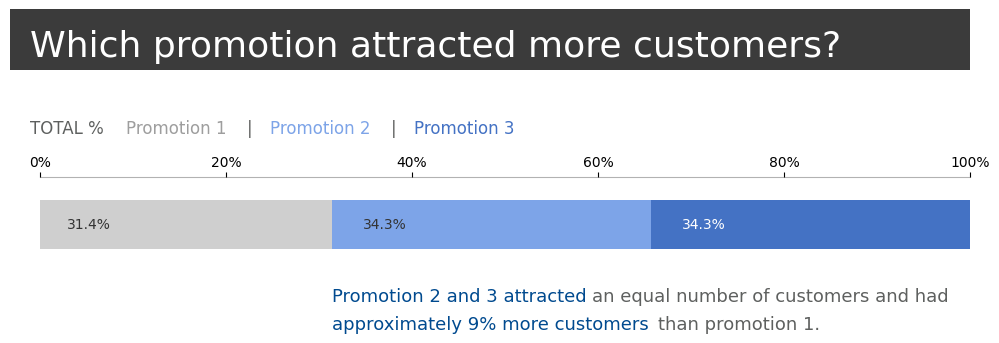

In [4]:
fig, ax = plt.subplots(figsize=(12, 0.7))

percentages = fast_food_df['Promotion'].value_counts(normalize=True).mul(100).round(1).reset_index().sort_values('Promotion')
categories = percentages['Promotion']
percentages = percentages['proportion']

left = 0
colors = ["#cfcfcf", "#7da4e8", "#4472c4"]
font_color = ['#333333', '#333333', 'white']
for i, (category, percentage) in enumerate(zip(categories, percentages)):
    ax.barh(0, percentage, left=left, height=0.5, label=category, color=colors[i])
    ax.text(left + percentage/6, 0, f'{percentage}%', 
            ha='center', va='center', color=font_color[i])
    
    left += percentage

ax.spines['top'].set_alpha(0.3)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_position(('outward', 15))
ax.xaxis.set_tick_params(pad=2)

plt.xlim(0, 100)
ax.set_xticks(range(0, 100 + 1, 20), ["0%", "20%", "40%", "60%", "80%", "100%"])

ax.yaxis.set_ticks([])

rect = patches.Rectangle((0.1, 2.7), 0.8, 0.87, 
                         facecolor='#3b3b3b', 
                         edgecolor='none', 
                         transform=fig.transFigure, 
                         zorder=-1)
fig.patches.append(rect)

ax.set_title('Which promotion attracted more customers?', loc='left', color="white", x=0.117, y=2.9, fontsize=26, transform=fig.transFigure)

ax.text(0.117, 1.8, 'TOTAL %',
        transform=fig.transFigure, fontsize=12, ha='left', color="#5e605f")

ax.text(0.117 + 0.08, 1.8, 'Promotion 1',
        transform=fig.transFigure, fontsize=12, ha='left', color="#9e9e9e")

ax.text(0.117 + 0.08 + 0.1, 1.8, '|',
        transform=fig.transFigure, fontsize=12, ha='left', color="#5e605f")

ax.text(0.117 + 0.08 + 0.1 + 0.02, 1.8, 'Promotion 2',
        transform=fig.transFigure, fontsize=12, ha='left', color="#7da4e8")

ax.text(0.117 + 0.08 * 2 + 0.1 + 0.02 * 2, 1.8, '|',
        transform=fig.transFigure, fontsize=12, ha='left', color="#5e605f")

ax.text(0.117 + 0.08 * 2 + 0.1 + 0.02 * 3, 1.8, 'Promotion 3',
        transform=fig.transFigure, fontsize=12, ha='left', color="#4472c4")

ax.text(0.368, -0.6, 'Promotion 2 and 3 attracted',
        transform=fig.transFigure, fontsize=13, ha='left', color="#004a8f")
ax.text(0.585, -0.6, 'an equal number of customers and had',
        transform=fig.transFigure, fontsize=13, ha='left', color="#5e605f")
ax.text(0.368, -1, 'approximately 9% more customers',
        transform=fig.transFigure, fontsize=13, ha='left', color="#004a8f")
ax.text(0.64, -1, 'than promotion 1.',
        transform=fig.transFigure, fontsize=13, ha='left', color="#5e605f")
plt.show()

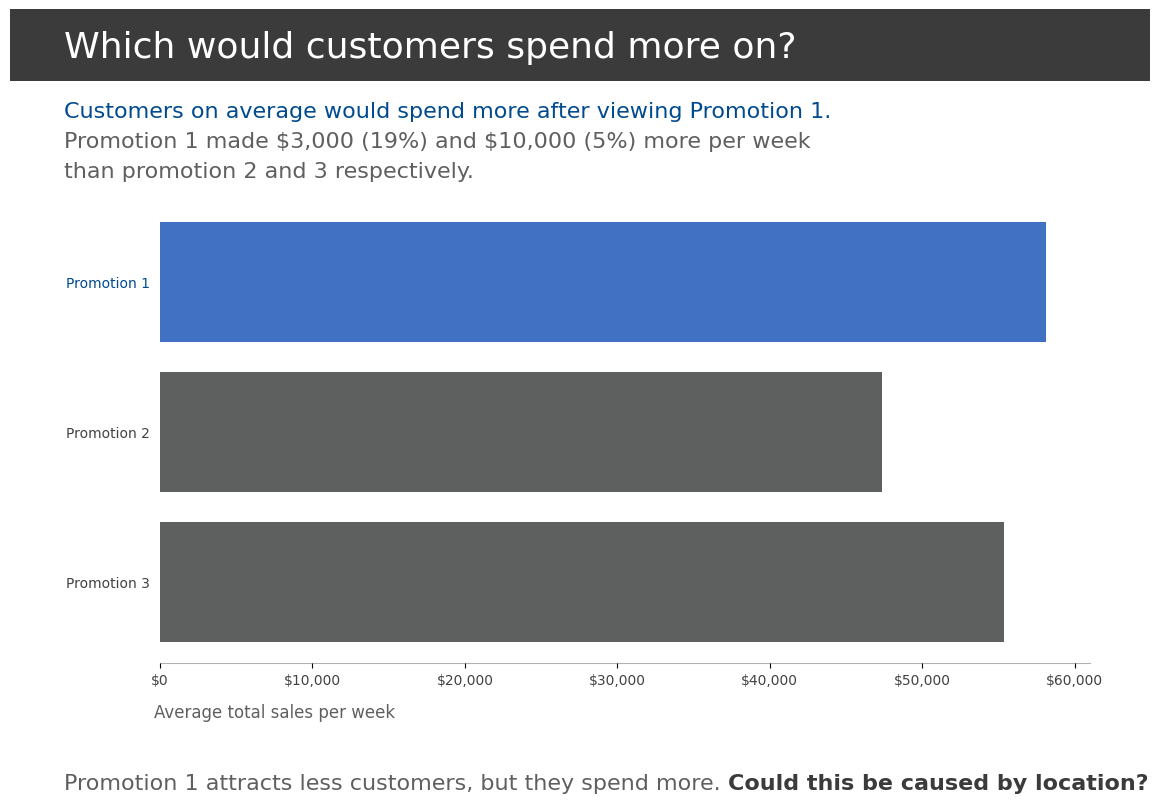

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

mean_sales = fast_food_df.groupby('Promotion')['SalesInThousands'].mean().reset_index()
ax.barh(mean_sales['Promotion'].values, mean_sales['SalesInThousands'].values[::-1], color=["#5e605f", "#5e605f", "#4171c2"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.yaxis.set_ticks_position('none')

rect = patches.Rectangle((0, 1.08), 0.95, 0.12, 
                         facecolor='#3b3b3b', 
                         edgecolor='none', 
                         transform=fig.transFigure, 
                         zorder=-1)
fig.patches.append(rect)

ax.set_title('Which would customers spend more on?', loc='left', color="white", x=0.045, y=1.12, fontsize=26, transform=fig.transFigure)

ax.set_xticks(ticks=range(0, 70, 10), labels=["$0", "$10,000", "$20,000", "$30,000", "$40,000", "$50,000", "$60,000"], color="#424242")
ax.set_yticks(ticks=[1, 2, 3], labels=["Promotion 3", "Promotion 2", "Promotion 1"], color="#424242")
yticks = plt.gca().get_yticklabels()
yticks[-1].set_color("#004a8f")

ax.text(0.045, 1.02, 'Customers on average would spend more after viewing Promotion 1.', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#004a8f")

ax.text(0.045, 0.97, 'Promotion 1 made \$3,000 (19%) and \$10,000 (5%) more per week', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#5e605f")

ax.text(0.045, 0.92, 'than promotion 2 and 3 respectively.', 
        transform=fig.transFigure, fontsize=16, ha='left', color="#5e605f")

ax.text(0.12, 0.02, 'Average total sales per week',
        transform=fig.transFigure, fontsize=12, ha='left', color="#5e605f")

ax.text(0.045, -0.1, 'Promotion 1 attracts less customers, but they spend more.',
        transform=fig.transFigure, fontsize=16, ha='left', color="#5e605f")

ax.text(0.598, -0.1, 'Could this be caused by location?',
        transform=fig.transFigure, fontsize=16, ha='left', color="#3b3b3b", fontweight='bold')
plt.show()

Looking at these, it appears that Promotion 1 and Promotion 3 are fairly similar and Promotion 2 is less effective. Now, let's test if these results are statistically significant.

# Hypothesis Testing

## Experimental Design

*    H0 (null hypothesis): There is no difference in sales between Promotion 1, Promotion 2, and Promotion 3.
*    H1 (alternative hypothesis): There is a difference in sales between Promotion 1, Promotion 2, and Promotion 3.
*    Significance level: 0.05
*    Confidence level: 95%
*    Statistical test: one-way ANOVA, Tukey's test

# Perform Statistical Test

## ANOVA

In [6]:
promotion_1 = fast_food_df[fast_food_df['Promotion'] == 1]['SalesInThousands']
promotion_2 = fast_food_df[fast_food_df['Promotion'] == 2]['SalesInThousands']
promotion_3 = fast_food_df[fast_food_df['Promotion'] == 3]['SalesInThousands']
f_oneway(promotion_1, promotion_2, promotion_3)

F_onewayResult(statistic=np.float64(21.953485793080677), pvalue=np.float64(6.765849261408714e-10))

The obtained p-value of 6.8e-10 is significantly less than the significance level of 0.05. Therefore, we reject the null hypothesis, indicating that there are statistically significant differences in sales among the promotions.

Now that we have rejected the null hypothesis, we can proceed to perform Tukey's test to determine which promotions are considered to be statistically different.

## Tukey's test

In [7]:
data = fast_food_df['SalesInThousands']
labels = fast_food_df['Promotion']
tukey_results = pairwise_tukeyhsd(data, labels, 0.05)

print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


*    Promotion 2 shows a statistically significant difference in sales compared to the other two promotions (p ≈ 0.000001, α < 0.05).
*    There is no statistically significant difference in sales between Promotion 1 and Promotion 3 (p = 0.2444, α > 0.05), indicating that observed differences could be due to random variation.

# Conclusion

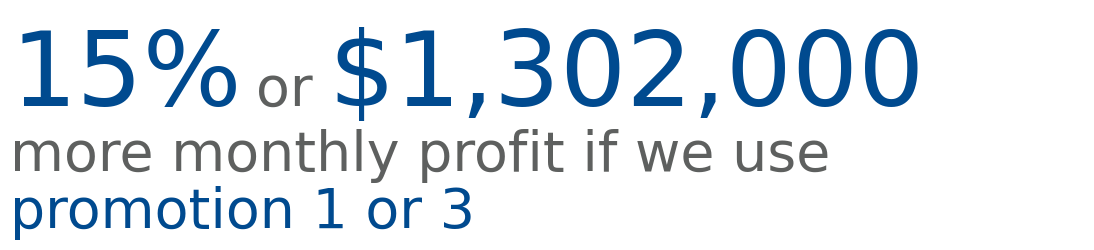

In [111]:
fig, ax = plt.subplots(figsize=(12, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(False)
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.005, 1., '15%', 
        transform=fig.transFigure, fontsize=75, ha='left', color="#004a8f")
ax.text(0.210, 1., 'or', 
        transform=fig.transFigure, fontsize=40, ha='left', color="#5e605f")
ax.text(0.27, 1., '$1,302,000', 
        transform=fig.transFigure, fontsize=75, ha='left', color="#004a8f")
ax.text(0.77, 1.50, 'more', 
        transform=fig.transFigure, fontsize=43, ha='left', color="white")
ax.text(0.005, 0.35, 'more monthly profit if we use', 
        transform=fig.transFigure, fontsize=40, ha='left', color="#5e605f")
ax.text(0.005, -0.22, 'promotion 1 or 3', 
        transform=fig.transFigure, fontsize=40, ha='left', color="#004a8f")
plt.show()

After performing ANOVA and Tukey's test, we conclude that Promotion 1 and Promotion 3 do not show a statistically significant difference from each other, while Promotion 2 is significantly different from both. However, Promotions 1 and 3 exhibit the highest sales performance. On average, choosing Promotion 1 or 3 would result in an approximate 15% increase in total monthly sales, equivalent to $1,302,000 compared to Promotion 2.